# Notebook for Color-Color Diagrammer

In [29]:
# Initialization of packages.
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
newfont = {"fontname": "serif"}

In [30]:
# Reading the Data
with open("./all_catalogue.pickle", "rb") as handle:
    catalogue = pkl.load(handle)
lists = catalogue.keys() #names: MAG for magnitude, eks. 770 står for filteret
MAG770 = []
MAG1000 = []
MAG1500 =[]
MAG770e = []
MAG1000e = []
MAG1500e =[]
MAG444 = []
MAG444e = []
for i in lists:
    MAG770.append(float(catalogue[i]["f770w"]["MAG_APER"]))
    MAG444.append(float(catalogue[i]["f444w"]["MAG_APER"]))
    MAG1000.append(float(catalogue[i]["f1000w"]["MAG_APER"]))
    MAG1500.append(float(catalogue[i]["f1500w"]["MAG_APER"]))
    MAG770e.append(float(catalogue[i]["f770w"]["MAGERR_APER"]))
    MAG1000e.append(float(catalogue[i]["f1000w"]["MAGERR_APER"]))
    MAG1500e.append(float(catalogue[i]["f1500w"]["MAGERR_APER"]))
    MAG444e.append(float(catalogue[i]["f444w"]["MAGERR_APER"]))

M6 = np.asarray(MAG444)-np.asarray(MAG770)
M3 = np.asarray(MAG770)-np.asarray(MAG1000)

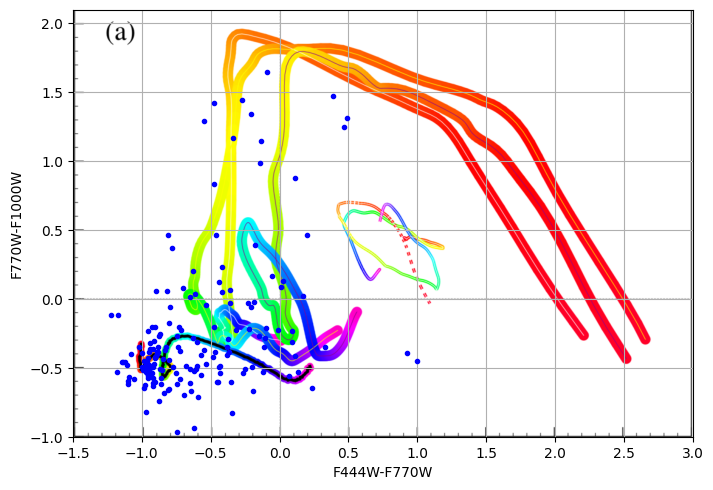

In [31]:
# Plot of f444w - f770w against f770w - f1000w
erm = plt.imread("./Danial paper 444 QUALITY.PNG") #Før upload har jeg ved en fejl slettet usikkerhedderne, derfor kommenteret ud
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])
plt.plot(M6, M3, ".", color="b", label = "data")
#plt.errorbar(M6, M3, yerr=uncerty, xerr=uncertx, linestyle = "", color="r", label = "error")
plt.xlabel("F444W-F770W")
plt.ylabel("F770W-F1000W")
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.grid()

In [32]:
# Redshift dataprocessing.
redshift = np.genfromtxt("photz.zout", skip_header=2, delimiter=None)
redshiftt = np.transpose(redshift)
red = redshiftt[17]

rrr = 0
for i in catalogue.keys():
    catalogue[i]["photo-z"] = red[rrr]
    rrr += 1
    
newred = []
M6new = []
M3new = []
for i in range(len(M6)):
    if M6[i] > 0.3 or M3[i] > -0.2:
        M6new.append(M6[i])
        M3new.append(M3[i])
        newred.append(red[i])

(-1.0, 2.1)

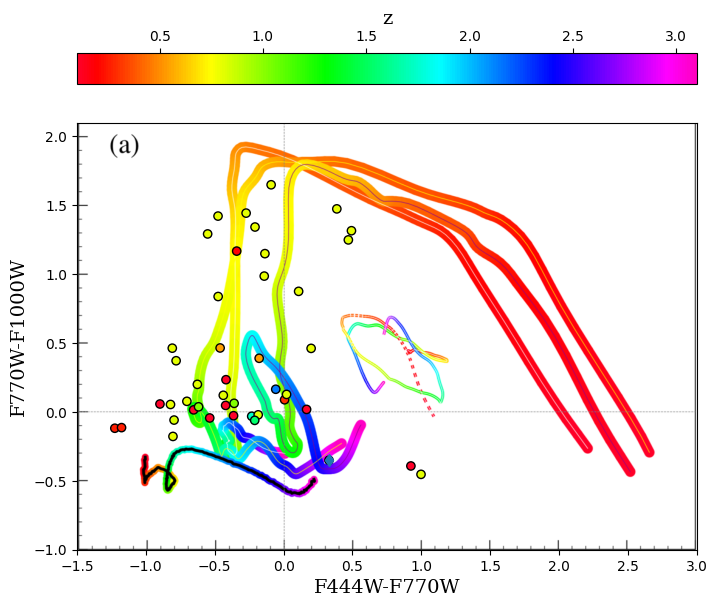

In [33]:
# Same plot as earlier with a redshift-colorbar and theoretical model.
sm = cm.colormaps["gist_rainbow"] #colorbar

plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])
ww = plt.scatter(M6new, M3new, marker="o", c=newred, vmin=0.1, vmax=3.1, cmap=sm, edgecolors="k")
plt.plot(M6new[20], M3new[20], marker="d")
plt.colorbar(ww, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)

In [34]:
# MUSE Dataprocessing.
museshift = []
musecompare = []
musered = []
muse444770 = []
muse7701000 = []
u68 = np.array([])
l68 = np.array([])
index = 0

for i in catalogue.keys():
    if "MUSE_data" in catalogue[i].keys():
        museshift.append(catalogue[i]["MUSE_data"]["z_muse"])
        musecompare.append(catalogue[i]["photo-z"])
        u68 = np.append(u68, redshiftt[8][index])
        l68 = np.append(l68, redshiftt[7][index])
        musered.append(catalogue[i]["MUSE_data"]["z_muse"])
        muse444770.append(float(catalogue[i]["f444w"]["MAG_APER"])-float(catalogue[i]["f770w"]["MAG_APER"]))
        muse7701000.append(float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))
        index += 1

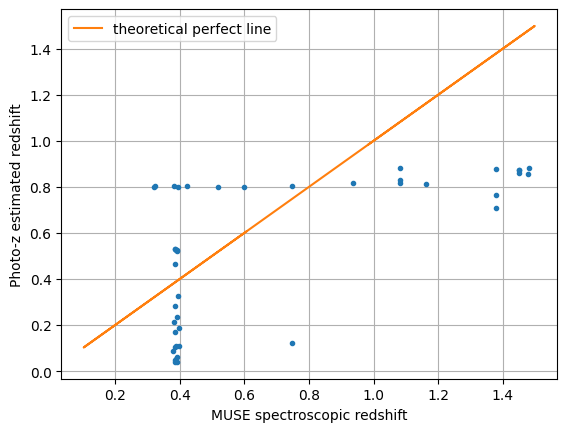

In [35]:
# Plot of MUSE spectroscopic redshift against Photo-z estimated redshift
line = np.random.uniform(0.1, 1.5, (1000))
plt.plot(museshift, musecompare, ".")
plt.xlabel("MUSE spectroscopic redshift")
plt.ylabel("Photo-z estimated redshift")
plt.plot(line, line, label="theoretical perfect line")
plt.legend()
plt.grid()

In [36]:
# Mask calculation and sorting loop.
something = 0
outfrac = 0
muse2 = []
phot2 = []
for i in range(len(museshift)):
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) > 0.15:
        something += 1
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) < 0.15:
        muse2.append(museshift[i])
        phot2.append(musecompare[i])
    outfrac = something/len(museshift)
print(f"Outfrac = {outfrac}")

Outfrac = 0.4883720930232558


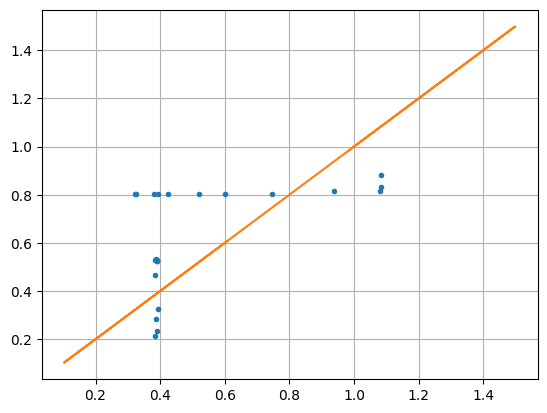

In [37]:
# Plot of MUSE-2.
plt.plot(muse2, phot2, ".")
plt.plot(line, line)
plt.grid()

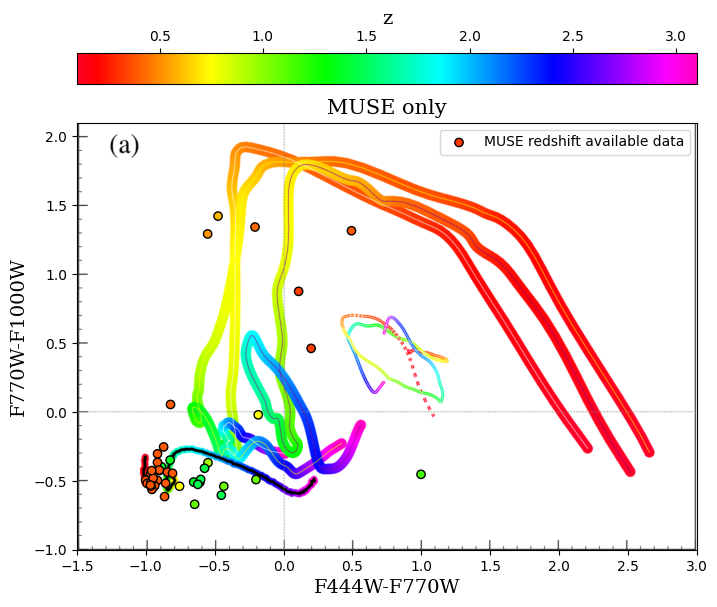

In [38]:
# Color-color diagram with only MUSE.
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])#, alpha=0.5)
www = plt.scatter(muse444770, muse7701000, c=musered, marker="o", edgecolor="k", vmin=0.1, vmax=3.1, cmap=sm, label = "MUSE redshift available data")
plt.colorbar(www, orientation="horizontal", location="top").set_label(label="z", **newfont, fontsize=14)
plt.title("MUSE only", **newfont, fontsize=15)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend()

<ErrorbarContainer object of 3 artists>

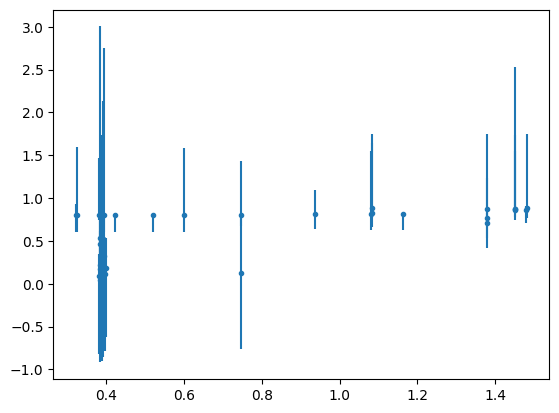

In [39]:
# Errorbar plot for MUSE-redshift data.
upper_limit = u68 - np.asarray(musecompare)
lower_limit = np.asarray(musecompare) - l68
#plt.plot(museshift, musecompare, ".")
plt.errorbar(museshift, musecompare, yerr=([abs(upper_limit), abs(lower_limit)]), fmt=".")
#print(upper_limit, lower_limit)